In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Dropout , Flatten , Input

In [2]:
tf.__version__

'2.19.0'

# Data Preprocessing

### Preprocessing the Training set


In [3]:
base_dir = 'dataset'

img_size = (64, 64)     ## Image Size Adjusted
batch_size = 32           ## Batch Size Adjusted

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

val_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)
 

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
model = tf.keras.models.Sequential()

### Step 1 - Convolution & Step 2 - Pooling

In [6]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(64, 64, 3)), 
    
    # 1st Convolution Layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # 2nd Convolution Layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolution Layer
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2))
])

### Step 3 - Flattening

In [7]:
model.add(Flatten())

### Step 4 - Full Connection

In [8]:
model.add(Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [9]:
model.add(Dense(2, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")


Training samples: 20000
Validation samples: 5000


### Training the CNN on the Training set and evaluating 

In [12]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data= val_generator
    )

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 209ms/step - accuracy: 0.9820 - loss: 0.0781 - val_accuracy: 0.4228 - val_loss: 8.8313
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 212ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.7856 - val_loss: 1.8757
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.4668 - val_loss: 5.4727
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 220ms/step - accuracy: 0.9983 - loss: 0.0043 - val_accuracy: 0.9972 - val_loss: 0.0077
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.9999 - loss: 4.2868e-04 - val_accuracy: 0.9998 - val_loss: 6.4464e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9944 - val_loss: 0.0135
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 225ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.5414 - val_loss: 8.7597
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 

## Making Prediction on Training Set

In [14]:
import numpy as np
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 233ms/step


# Confusion Matrix and ccuracy Score

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(y_true , y_pred)
print(cm)

accuracy_score(y_true , y_pred)

[[1998    2]
 [   0 3000]]


0.9996

# using MatplotLib for Analysing on graph

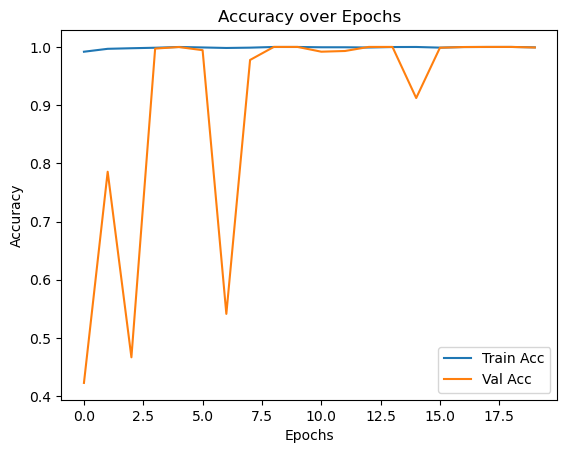

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
